# Lotto plus scores probability roulette 

## Analytic Approach

### We will be building neural network model based of the most frequent occurrences in lotto score sequences using tensorflow

In [17]:
from scipy import stats
import tensorflow as tf

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Data collection

In [18]:
data = pd.read_csv('dl_plus.txt', sep=" ", header=None)
data.columns = ["number", "date", "scores"]

In [19]:
data.head()

,number,date,scores
0,1.0,15.09.2012,"4,5,37,39,43,49"
1,2.0,18.09.2012,"24,36,40,41,43,47"
2,3.0,20.09.2012,"9,15,17,20,23,40"
3,4.0,22.09.2012,"11,13,22,28,32,37"
4,5.0,25.09.2012,"4,9,14,24,44,47"


## Data understanding and preparation

In [20]:
data['first'], data['second'], data['third'], data['fourth'], data['fifth'], data['sixth'] = data['scores'].str.split(',').str
data.drop(['number', 'date', 'scores'], axis=1, inplace=True)

for col in ['first', 'second', 'third', 'fourth', 'fifth', 'sixth']:
    data[col] = data[col].astype(int)
    
data.head()

,first,second,third,fourth,fifth,sixth
0,4,5,37,39,43,49
1,24,36,40,41,43,47
2,9,15,17,20,23,40
3,11,13,22,28,32,37
4,4,9,14,24,44,47


## Pre model data visualization

In [21]:
sns.set()
def draw_figure(number):
    plt.figure(figsize=(18,12))
    sns.countplot(x=number, data=data)
    plt.title(str(number + " ball sorted"), fontsize=24)
    plt.ylabel('occurrences', fontsize=16)
    plt.xlabel('number', fontsize=16)

### Visualize sum of occurrences in every ball sorted by values

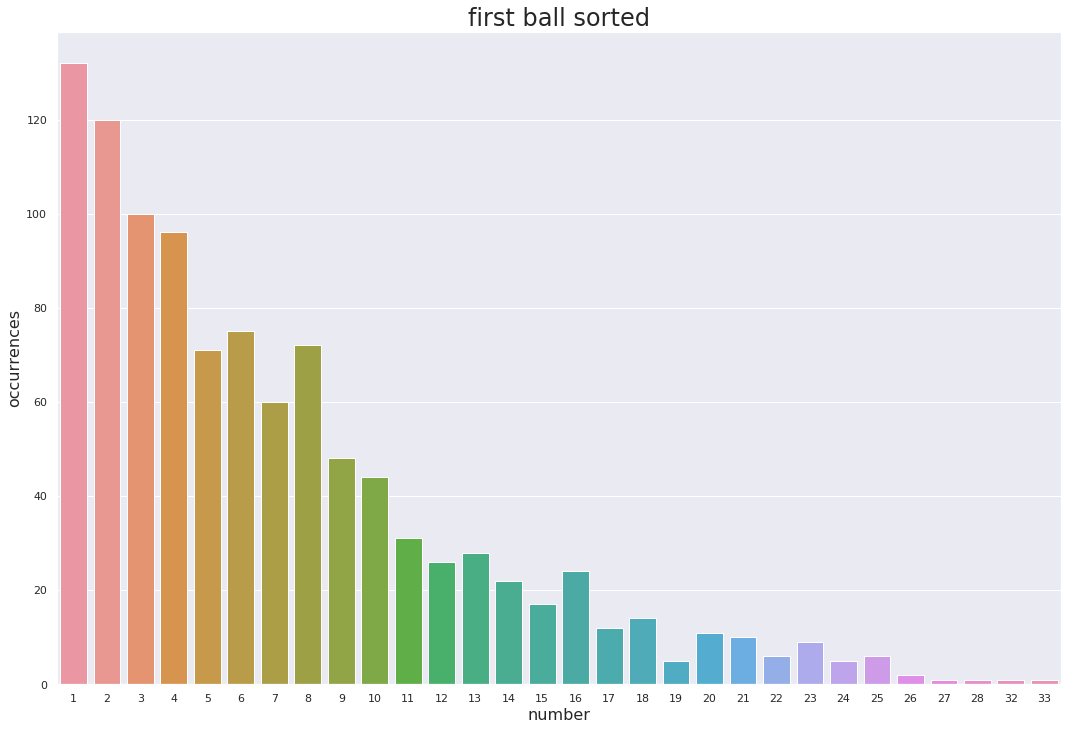

In [22]:
draw_figure('first')

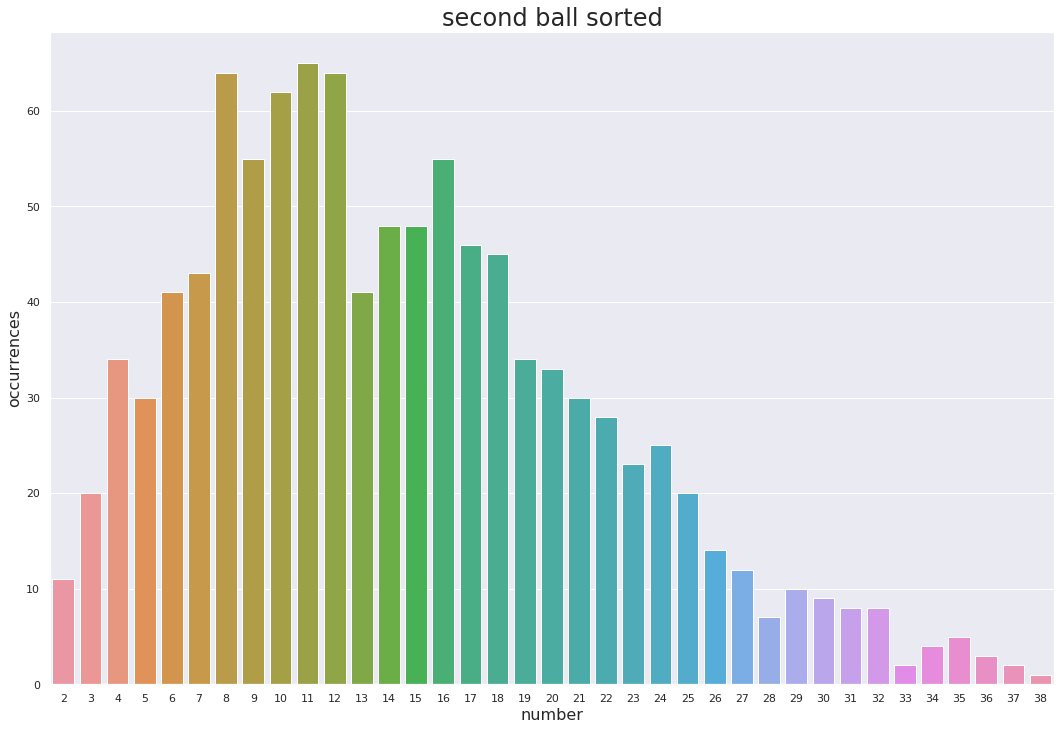

In [23]:
draw_figure('second')

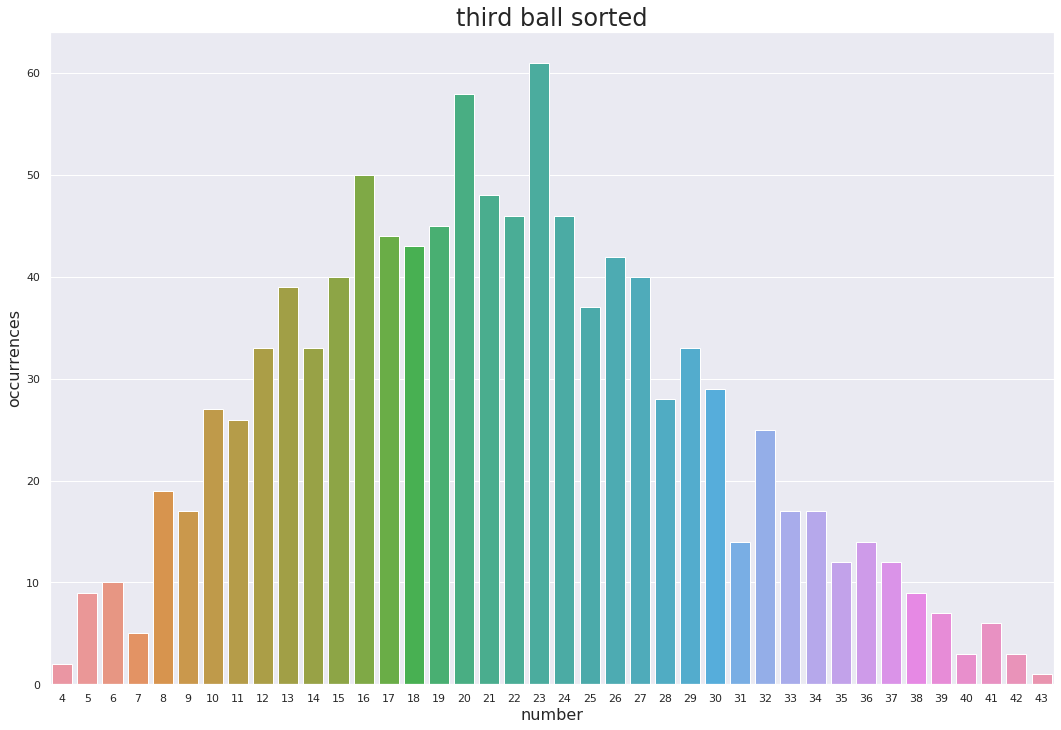

In [24]:
draw_figure('third')

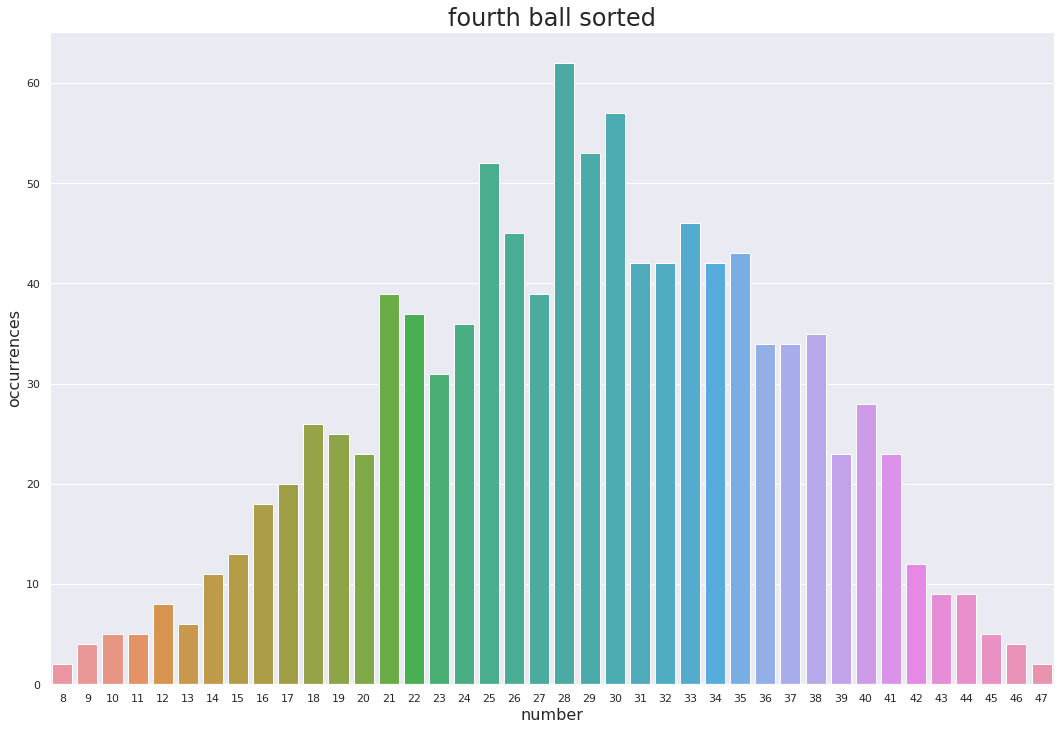

In [25]:
draw_figure('fourth')

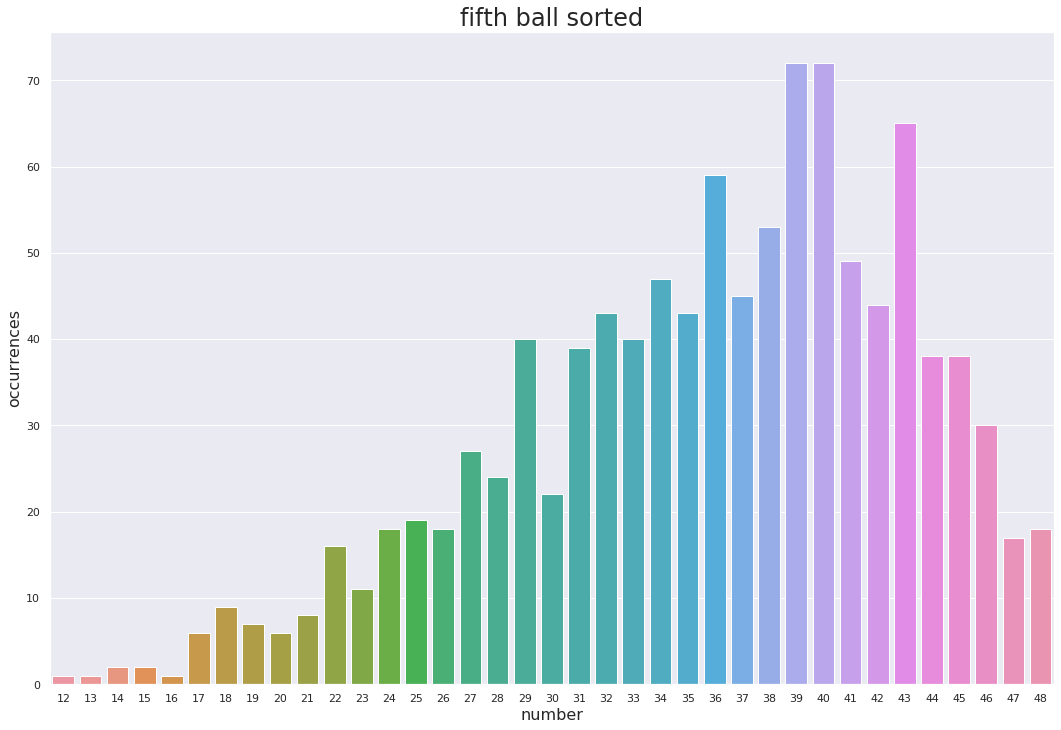

In [26]:
draw_figure('fifth')

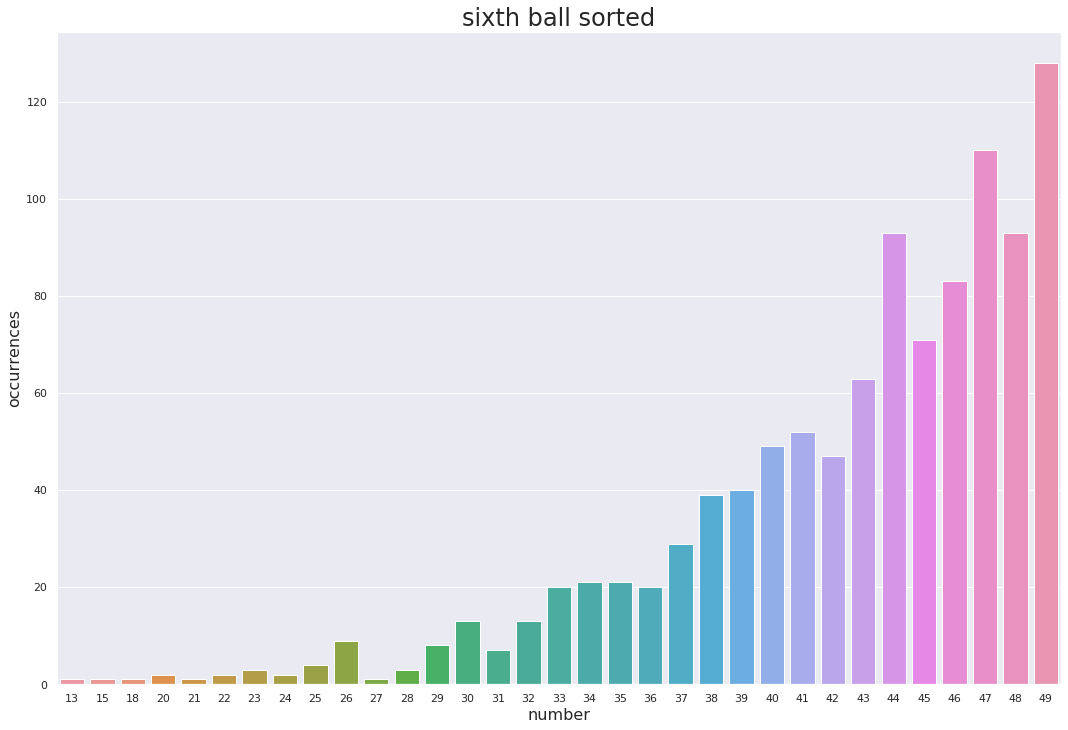

In [27]:
draw_figure('sixth')

### Get sum of total roulette come out numbers

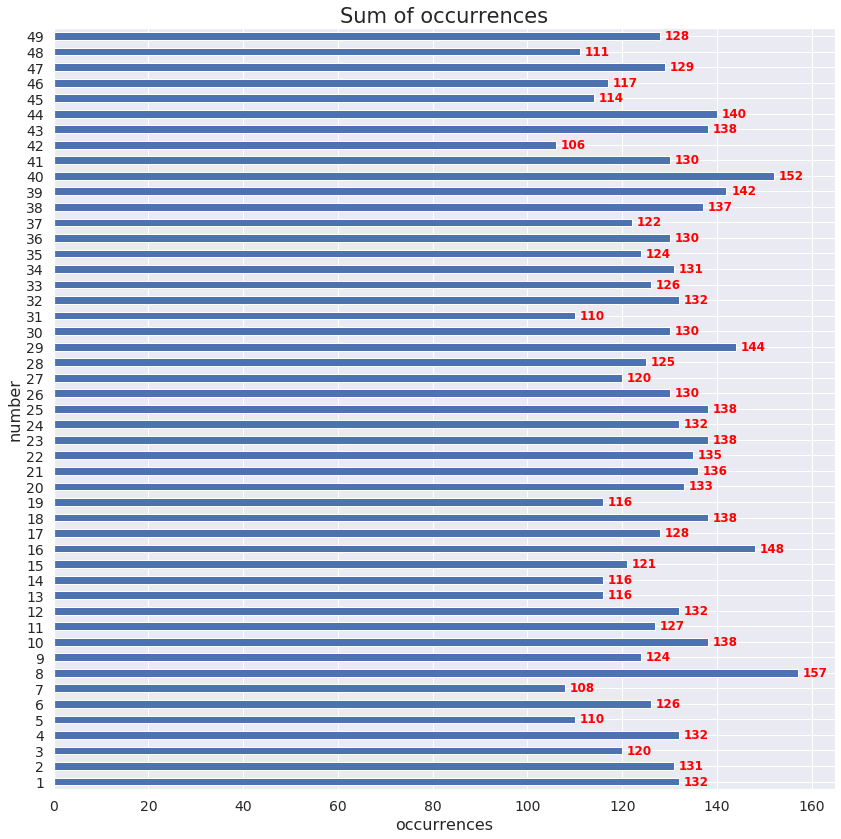

In [29]:
sum_of_occurrences = data['first'].value_counts().add(data['second'].value_counts(), fill_value=0).add(data['third'].value_counts(), fill_value=0).add(data['fourth'].value_counts(), fill_value=0).add(data['fifth'].value_counts(), fill_value=0).add(data['sixth'].value_counts(), fill_value=0)
sum_of_occurrences = sum_of_occurrences.astype('int64', copy=False)

ax = sum_of_occurrences.plot(kind='barh', figsize=(14,14), title='sum of occurrences', fontsize=14)

ax.set_title('Sum of occurrences',fontsize=21)
ax.set_xlabel('occurrences',fontsize = 16)
ax.set_ylabel('number', fontsize = 16)

for i, v in enumerate(sum_of_occurrences):
    ax.text(v+1, i-0.2, str(v), color='red', fontweight='bold')

### Most frequent numbers overall

In [30]:
sum_of_occurrences.nlargest(6)

8     157
40    152
16    148
29    144
39    142
44    140
dtype: int64

## Data modeling into neural network

In [63]:
# input layer
input_layer = np.ones(49)
input_layer

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [64]:
# dimension of input array
input_layer.shape

(49,)

In [65]:
# input weights: sequential occurrences of given numbers
input_weights = np.array(sum_of_occurrences)
input_weights = stats.zscore(input_weights)
input_weights

array([ 0.3081993 ,  0.21830784, -0.77049825,  0.3081993 , -1.66941287,
       -0.23114947, -1.84919579,  2.55548585, -0.4109324 ,  0.84754807,
       -0.14125801,  0.3081993 , -1.13006409, -1.13006409, -0.68060678,
        1.74646269, -0.05136655,  0.84754807, -1.13006409,  0.39809076,
        0.66776515,  0.57787368,  0.84754807,  0.3081993 ,  0.84754807,
        0.12841637, -0.77049825, -0.32104094,  1.38689684,  0.12841637,
       -1.66941287,  0.3081993 , -0.23114947,  0.21830784, -0.4109324 ,
        0.12841637, -0.59071532,  0.75765661,  1.20711392,  2.10602854,
        0.12841637, -2.02897871,  0.84754807,  1.02733099, -1.30984702,
       -1.04017263,  0.03852491, -1.5795214 , -0.05136655])

In [66]:
input_weights.shape

(49,)

In [127]:
# labels : scores from every lotto draw
labels = data.values.tolist()

labels_encoded = []

for label in labels:
    label_encoded = np.zeros(49)
    
    for value in label:
        label_encoded[value - 1] = 1
        
    labels_encoded.append(label_encoded)

labels = np.asarray(labels_encoded)
labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [128]:
labels.shape

(1050, 49)

In [129]:
y_test = labels
y_test.shape

(1050, 49)

## Evaluation

In [145]:
model = tf.keras.Sequential()

In [146]:
model.add(tf.keras.layers.Dense(49, activation='softmax', input_dim=1))

In [147]:
model.add(tf.keras.layers.Dense(49, activation='softmax'))

In [155]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [156]:
model.fit(input_layer, labels[0], epochs=10, sample_weight=input_weights) 

#for label in labels:
#    model.fit(input_layer, label, epochs=10, sample_weight=input_weights) 

Epoch 1/10
49/49 [==============================] - 0s 2ms/sample - loss: 3.8910 - acc: 0.0000e+00
Epoch 2/10
49/49 [==============================] - 0s 130us/sample - loss: 3.8828 - acc: 0.3265
Epoch 3/10
49/49 [==============================] - 0s 136us/sample - loss: 3.8747 - acc: 0.8776
Epoch 4/10
49/49 [==============================] - 0s 121us/sample - loss: 3.8659 - acc: 0.8776
Epoch 5/10
49/49 [==============================] - 0s 82us/sample - loss: 3.8744 - acc: 0.8776
Epoch 6/10
49/49 [==============================] - 0s 163us/sample - loss: 3.8519 - acc: 0.8776
Epoch 7/10
49/49 [==============================] - 0s 152us/sample - loss: 3.8455 - acc: 0.8776
Epoch 8/10
49/49 [==============================] - 0s 91us/sample - loss: 3.8410 - acc: 0.8776
Epoch 9/10
49/49 [==============================] - 0s 180us/sample - loss: 3.8258 - acc: 0.8776
Epoch 10/10
49/49 [==============================] - 0s 161us/sample - loss: 3.7806 - acc: 0.8776


## Deployment

In [157]:
predictions = model.predict(y_test[0])
predictions[0]

array([0.0218886 , 0.02157551, 0.02060306, 0.020468  , 0.02030831,
       0.02021467, 0.02042402, 0.02039793, 0.0206157 , 0.02033525,
       0.02033155, 0.02018298, 0.02036603, 0.02042518, 0.02036479,
       0.02038416, 0.02036261, 0.0204529 , 0.02013996, 0.02045589,
       0.02018275, 0.02026868, 0.02018116, 0.02011648, 0.02036713,
       0.02043045, 0.02035325, 0.02051353, 0.02028576, 0.02014719,
       0.02041682, 0.02022334, 0.02062096, 0.02031252, 0.02038657,
       0.02029515, 0.02032708, 0.02048943, 0.02030768, 0.02024021,
       0.02031179, 0.02037953, 0.02045502, 0.02027264, 0.0203004 ,
       0.02031158, 0.0204479 , 0.02042417, 0.02033389], dtype=float32)

## Feedback

In [158]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 49)                98        
_________________________________________________________________
dense_23 (Dense)             (None, 49)                2450      
Total params: 2,548
Trainable params: 2,548
Non-trainable params: 0
_________________________________________________________________


In [159]:
tf.keras.utils.plot_model(model, to_file='model.png')